In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam as LegacyAdam  # Import optimizer versi lama


# Load CSV file with image_id and Male columns
celeba_data = pd.read_csv('clean_attribute_lila2.csv')
celeba_data['male'] = celeba_data['male'].astype(str)

# Split the data into training and validation sets
train_data, valid_data = train_test_split(celeba_data, test_size=0.1, random_state=42)

# Set up data generators
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224)
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224)
)

# Load ResNet101 model without the top layer
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of ResNet101
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Set up optimizer with custom learning rate
optimizer = LegacyAdam(learning_rate=0.001)  # Menggunakan versi lama dari optimizer

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Implement ReduceLROnPlateau and EarlyStopping callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=valid_generator
)

# Save the trained model to an h5 file
model.save("E_ResNet101_TZ10_E100_optimized.h5")

Found 4500 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Epoch 1/100
141/141 [==============================] - 185s 1s/step - loss: 0.6748 - accuracy: 0.5913 - val_loss: 0.6408 - val_accuracy: 0.6260
Epoch 2/100
141/141 [==============================] - 182s 1s/step - loss: 0.6290 - accuracy: 0.6436 - val_loss: 0.6946 - val_accuracy: 0.4680
Epoch 3/100
141/141 [==============================] - 182s 1s/step - loss: 0.6286 - accuracy: 0.6538 - val_loss: 0.6561 - val_accuracy: 0.6160
Epoch 4/100
141/141 [==============================] - 177s 1s/step - loss: 0.5866 - accuracy: 0.6947 - val_loss: 0.5729 - val_accuracy: 0.7720
Epoch 5/100
141/141 [==============================] - 176s 1s/step - loss: 0.5774 - accuracy: 0.7042 - val_loss: 0.5432 - val_accuracy: 0.7400
Epoch 6/100
141/141 [==============================] - 177s 1s/step - loss: 0.5622 - accuracy: 0.7049 - val_loss: 0.5351 - val_accuracy: 0.7940
Epoch 7/100
141

Epoch 57/100
141/141 [==============================] - 178s 1s/step - loss: 0.4195 - accuracy: 0.8042 - val_loss: 0.3978 - val_accuracy: 0.8320
Epoch 58/100
141/141 [==============================] - 178s 1s/step - loss: 0.4055 - accuracy: 0.8167 - val_loss: 0.4048 - val_accuracy: 0.8360
Epoch 59/100
141/141 [==============================] - 178s 1s/step - loss: 0.4102 - accuracy: 0.8111 - val_loss: 0.3951 - val_accuracy: 0.8340
Epoch 60/100
141/141 [==============================] - 178s 1s/step - loss: 0.4204 - accuracy: 0.8078 - val_loss: 0.4024 - val_accuracy: 0.8160
Epoch 61/100
141/141 [==============================] - 179s 1s/step - loss: 0.4098 - accuracy: 0.8076 - val_loss: 0.3918 - val_accuracy: 0.8340
Epoch 62/100
141/141 [==============================] - 175s 1s/step - loss: 0.4508 - accuracy: 0.7840 - val_loss: 0.4504 - val_accuracy: 0.8040
Epoch 63/100
141/141 [==============================] - 178s 1s/step - loss: 0.4120 - accuracy: 0.8089 - val_loss: 0.3930 - val_ac

/Users/lilakastara/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 5000 validated image filenames belonging to 2 classes.
157/157 [==============================] - 183s 1s/step - loss: 0.3864 - accuracy: 0.8320
Validation Loss: 0.38643208146095276
Validation Accuracy: 0.8320000171661377


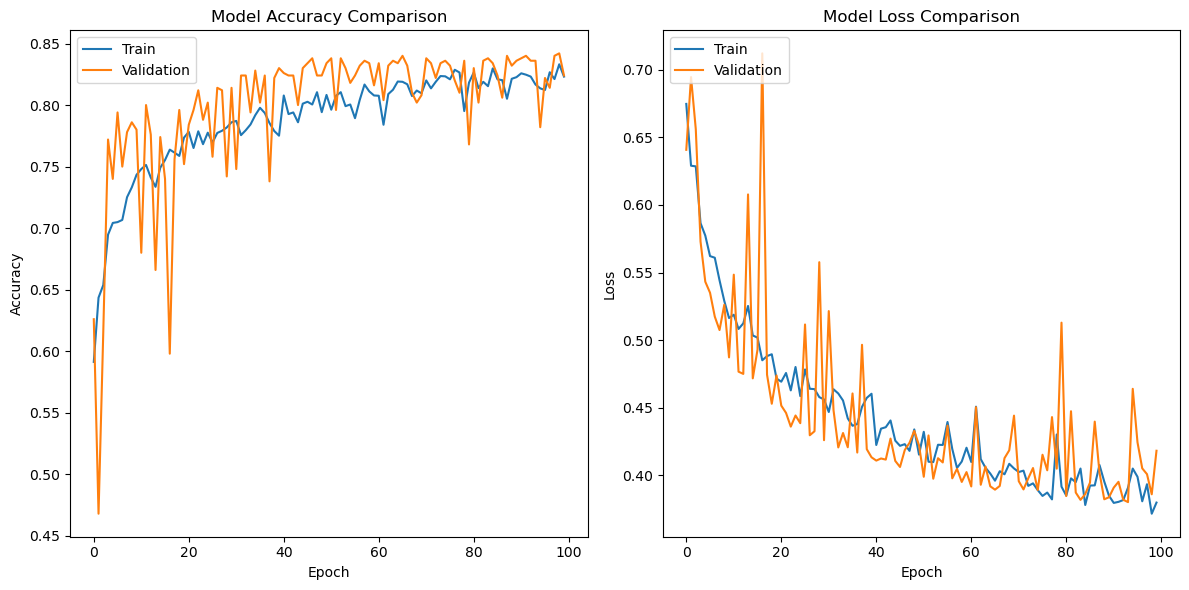

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved ResNet101 model
saved_model = load_model("E_ResNet101_TZ10_E100_optimized.h5")

# Load CSV file with image_id and Male columns
celeba_data = pd.read_csv('clean_attribute_lila2.csv')
celeba_data['male'] = celeba_data['male'].replace(-1, 0).astype(str)

# Set up data generators for validation
datagen = ImageDataGenerator(rescale=1./255)

valid_generator = datagen.flow_from_dataframe(
    dataframe=celeba_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224)
)

# Evaluate the model on the validation set
evaluation = saved_model.evaluate(valid_generator)

# Print the evaluation results
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")

# Plot training history (if you have the history from training)
# Assuming you have a history variable like history = model.fit(...)
# Comment out this part if you don't have the history variable

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show plots
plt.tight_layout()
plt.show()

Found 500 validated image filenames belonging to 2 classes.
16/16 [==============================] - 19s 1s/step
Accuracy: 0.8240
Precision: 0.7328
Recall: 0.8916
F1 Score: 0.8044
ROC AUC: 0.9089


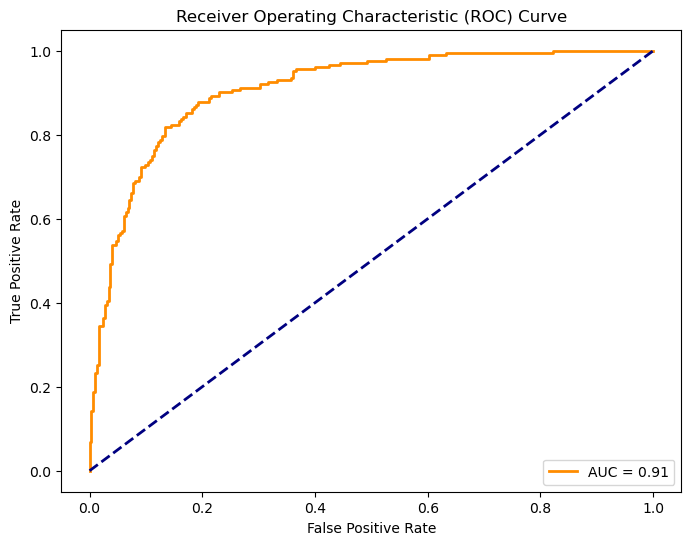

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set up data generators
datagen = ImageDataGenerator(rescale=1./255)

# Set up generator for validation data
valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',  # Sesuaikan dengan klasifikasi biner
    target_size=(224, 224)
)


# Evaluasi model pada data validasi
valid_generator.reset()  # Reset generator untuk memastikan dimulai dari awal

# Predict probabilities
y_pred_probs = model.predict(valid_generator, steps=len(valid_generator), verbose=1)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)

# Ambil jumlah sampel yang sesuai dengan metrik evaluasi
num_samples = len(valid_generator.classes)

# Ambil sampel yang sesuai dengan jumlah sampel yang diharapkan oleh metrik evaluasi
y_true = valid_generator.classes[:num_samples]

# Metrik evaluasi
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_probs)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Plot kurva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 1s 555ms/step


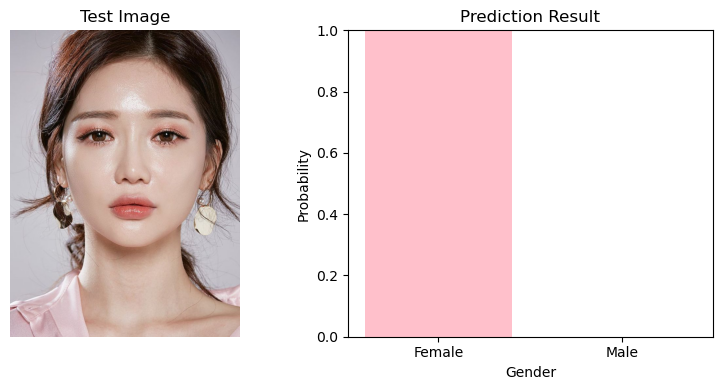

Model predicts: Female


In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the saved ResNet50 model
saved_model = load_model("E_ResNet101_TZ10_E100_optimized.h5")

# Load the image you want to test
img_path = '289480926.jpg'  # Ganti dengan path gambar yang ingin Anda uji
img = image.load_img(img_path, target_size=(224, 224))  # Sesuaikan dengan ukuran input ResNet50
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make the prediction using the saved model
prediction = saved_model.predict(img_array)

# Interpret the prediction result
if prediction[0][0] > 0.5:
    result = "Male"
else:
    result = "Female"

# Display the image and prediction result
plt.figure(figsize=(8, 4))

# Display the image
plt.subplot(1, 2, 1)
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title('Test Image')

# Display the prediction result

plt.subplot(1, 2, 2)
plt.bar(['Female', 'Male'], [1 - prediction[0][0], prediction[0][0]], color=['pink', 'blue'])
plt.title('Prediction Result')
plt.xlabel('Gender')
plt.ylabel('Probability')
plt.ylim([0, 1])

# Show the plots
plt.tight_layout()
plt.show()

# Print the final result
print(f"Model predicts: {result}")